In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(7,11)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
result = np.zeros((720,700))

In [3]:
months

['07', '08', '09', '10']

In [4]:
for yy in years:
    for mm in months:
        #data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        #cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0323-09.aice.nc
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.aice.nc')
        plotvar = data.variables['aice'][0,:,:]
        #plotvar = data.variables['HMXL'][0,:,:]
        lont = data.variables['lont_bounds'][:,:,0]
        latt = data.variables['latt_bounds'][:,:,0]
        lont = lont[0:344,700:1400]
        latt = latt[0:344,700:1400]
        #lont = lont[248:344,700:1400]
        #latt = latt[248:344,700:1400]
        #plotvar = plotvar[248:344,700:1400]
        #aveplot = plotvar.mean(axis=0)
        plotvar = plotvar[0:344,700:1400]
        plotvar[plotvar > 93] = np.nan
        aveplot = np.nanmean(plotvar,axis=0)

        result[i] = aveplot
        
        i = i + 1
#********************************************************************


/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


In [5]:
result[:,0]

array([84.56694031, 83.59912109, 91.8361969 , 88.11425018, 84.75833893,
       88.0929718 , 91.62859344, 85.88375854, 91.9002533 , 91.98368835,
       91.31607056, 88.9937439 , 92.49888611, 92.44048309, 91.76846313,
       91.15441895, 83.03788757, 92.39256287, 89.94564056, 89.68906403,
       91.69651031, 81.23596191, 90.87564087, 88.2064743 , 92.64226532,
       89.79393005, 90.77788544, 86.74739075, 92.10279846, 91.1505661 ,
       91.93653107, 87.32608795, 88.08979797, 92.35584259, 90.56935883,
       91.33094025, 88.31666565, 87.09288788, 92.54727173, 89.60501862,
       92.62657166, 88.15908813, 90.57669067, 90.04846191, 90.66372681,
       92.19522095, 91.2912674 , 87.42510986, 85.393013  , 92.67146301,
       89.86833954, 91.14535522, 91.92967987, 92.42056274, 92.0973587 ,
       89.407341  , 91.83921051, 83.78546906, 91.80890656, 90.44892883,
       92.53764343, 91.73471832, 90.28146362, 91.87165833, 92.20711517,
       90.73687744, 89.83839417, 91.10741425, 84.06208038, 92.33

In [6]:
nn = result.reshape(180,4,700)

In [7]:
nnnn = nn.mean(axis=1)

In [8]:
seaice = result.mean(axis=1)

In [9]:
np.savetxt('Seaice.out', seaice)

In [10]:
A = np.arange(180)
B = np.arange(700)
xx, yy = np.meshgrid(B, A)

In [11]:
#################################################################
nice_cmap=plt.get_cmap('Blues')
lev_cmap = nice_cmap([250,240,230,220,210,200,190,180,170,160,150,130,110,100,90,80,70,60,50,40,25,10,0])
new_cmap = cols.ListedColormap(lev_cmap,"Blues")
nice_levels = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)


/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'spacing'
  import sys
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


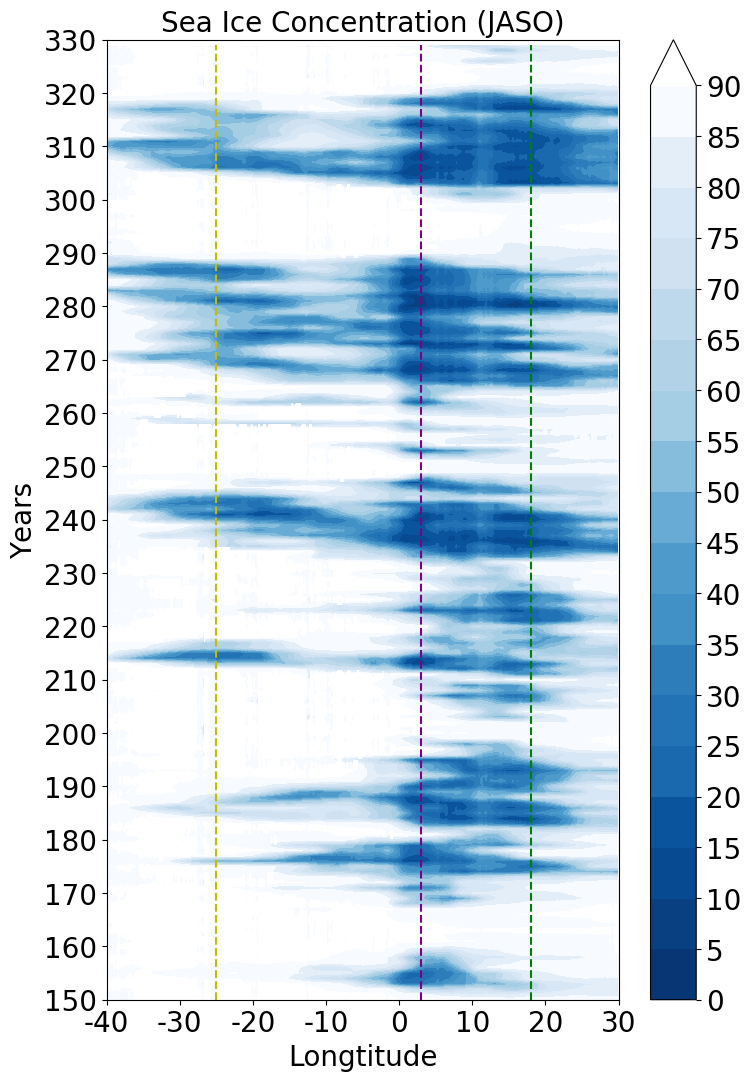

In [12]:
# plot the result
fig = plt.figure(figsize=(8, 12),dpi=100)
ax0 = fig.add_axes([0.15, 0.1, 0.8, 0.8])
#ax0 = fig.add_axes()
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, nnnn,cmap =new_cmap ,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')

im.cmap.set_over('white')
#im.cmap.set_under('darkblue')
#CS = ax0.contour(xx[:,430],yy[:,430],colors = 'r')
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
#plt.hlines((27-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((39-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((56-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((69-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((94-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((106-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((120-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((138-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((168-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((203-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((252-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((261-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((300-20)*4, 0, 699, colors = "y",linestyles = "dashed")
#plt.hlines((326-20)*4, 0, 699, colors = "y",linestyles = "dashed")


plt.vlines(430, 0, 179, colors = "purple",linestyles = "dashed")
plt.vlines(580, 0, 179, colors = "g",linestyles = "dashed")
plt.vlines(150, 0, 179, colors = "y",linestyles = "dashed")
#plt.vlines(130, 0, 309, colors = "k",linestyles = "dashed")
#############################################################################
##设定X坐标值
#plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)

plt.xticks(range(0,701,100), ['-40','-30','-20','-10', '0', '10', '20','30'],**my_font)
#plt.yticks(range(0,151,10), ['180', '190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.yticks(range(0,181,10), ['150','160','170',\
                             '180','190','200', '210','220','230', '240','250', '260','270','280','290','300','310','320','330'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Sea Ice Concentration (JASO)',**my_font)
plt.savefig("HMXL300.png",bbox_inches='tight',dpi=fig.dpi)

In [13]:
result.shape

(720, 700)

In [14]:
weddle = result[:,150]
maudrise = result[:,430]
degree15 = result[:,550]

In [15]:
np.savetxt('weddle.out', weddle)

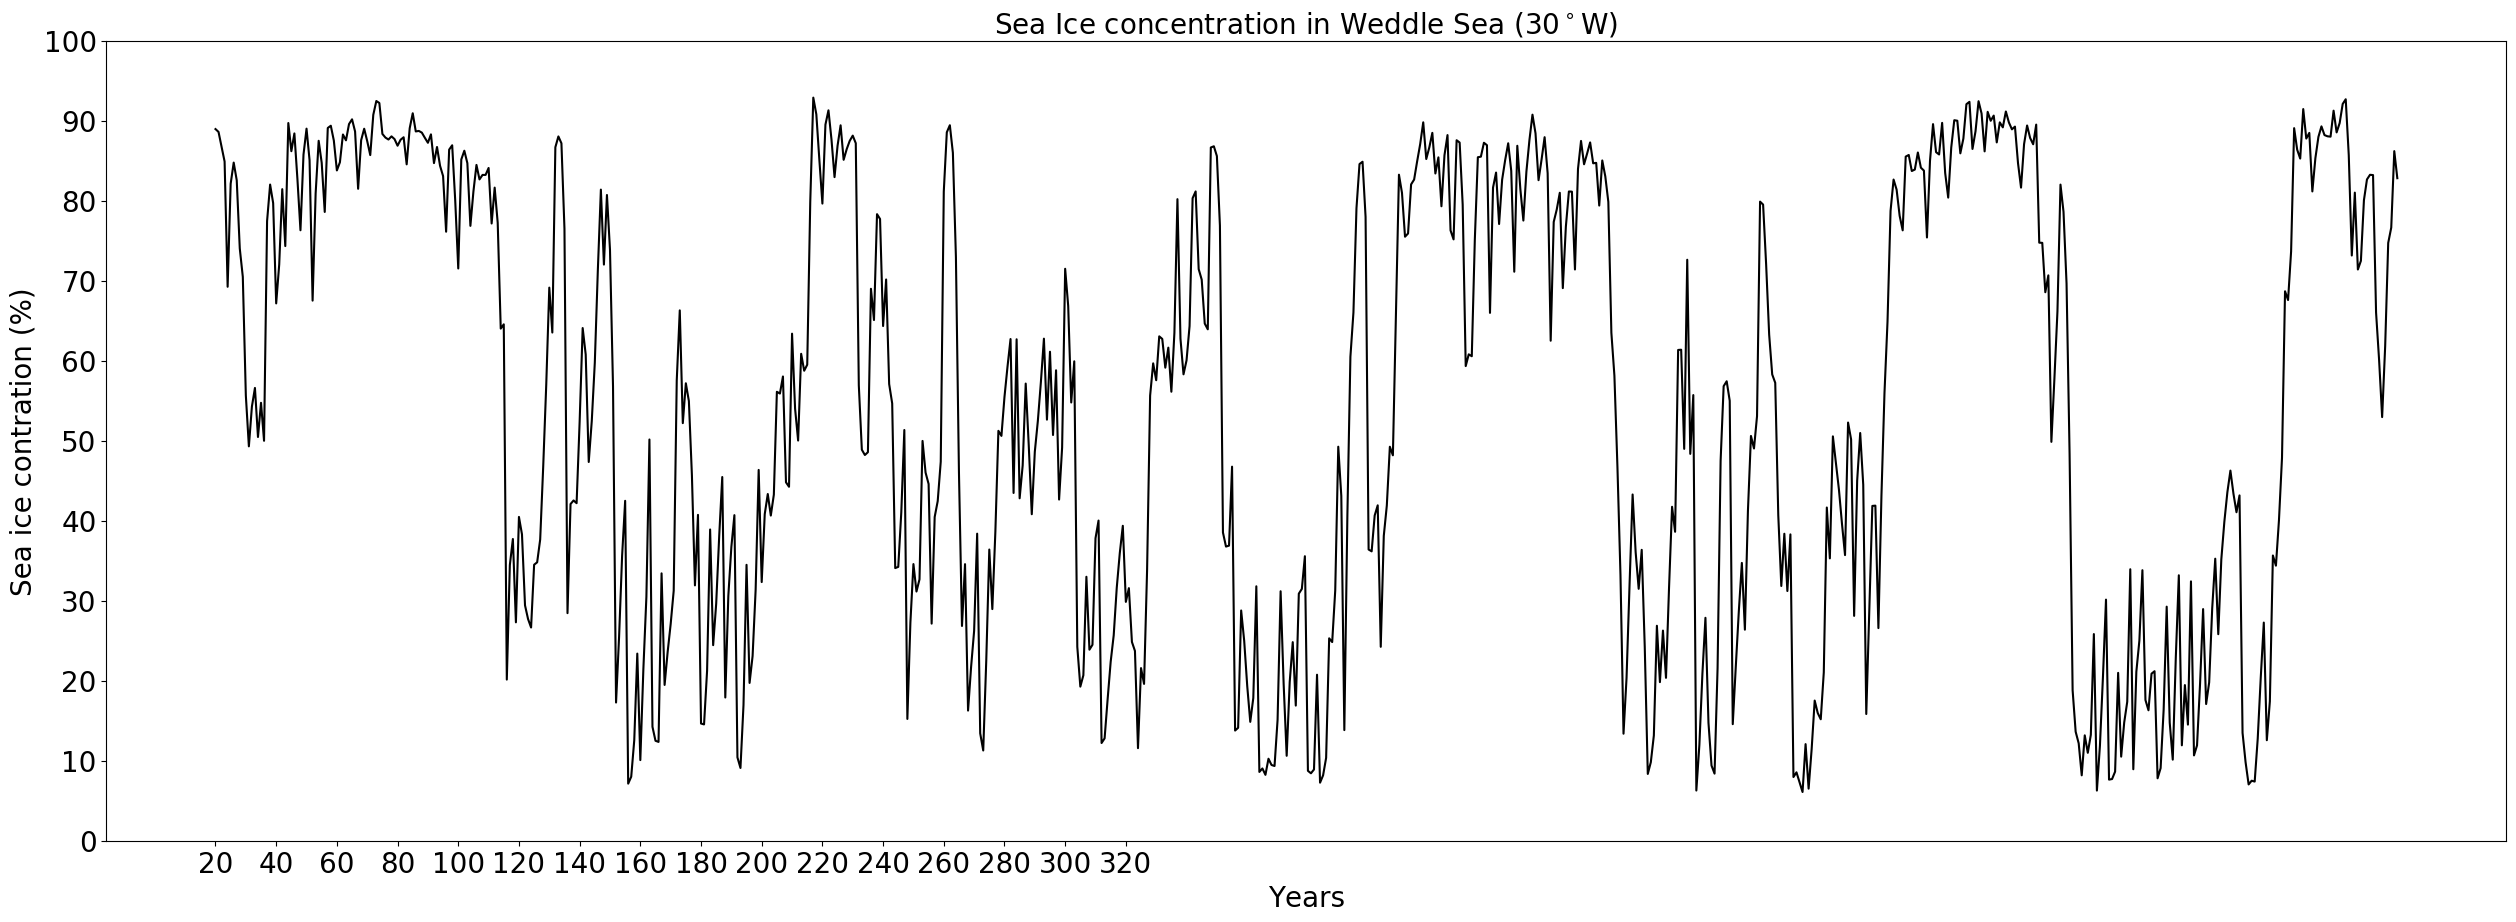

In [16]:
fig = plt.figure(figsize=(30, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(degree15,'k')
#im = ax0.plot(weddle,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,311,20), ['20', '40', '60', '80','100','120','140','160',\
                             '180','200','220', '240', '260','280','300','320'],**my_font)
plt.yticks(range(0,101,10), ['0', '10','20','30', '40', '50','60','70', '80','90','100'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Sea ice contration (%)',**my_font)
ax0.set_title('Sea Ice concentration in Weddle Sea (30$^\circ$W)',**my_font)
plt.savefig("weddle.png")
np.savetxt('15.out', degree15)

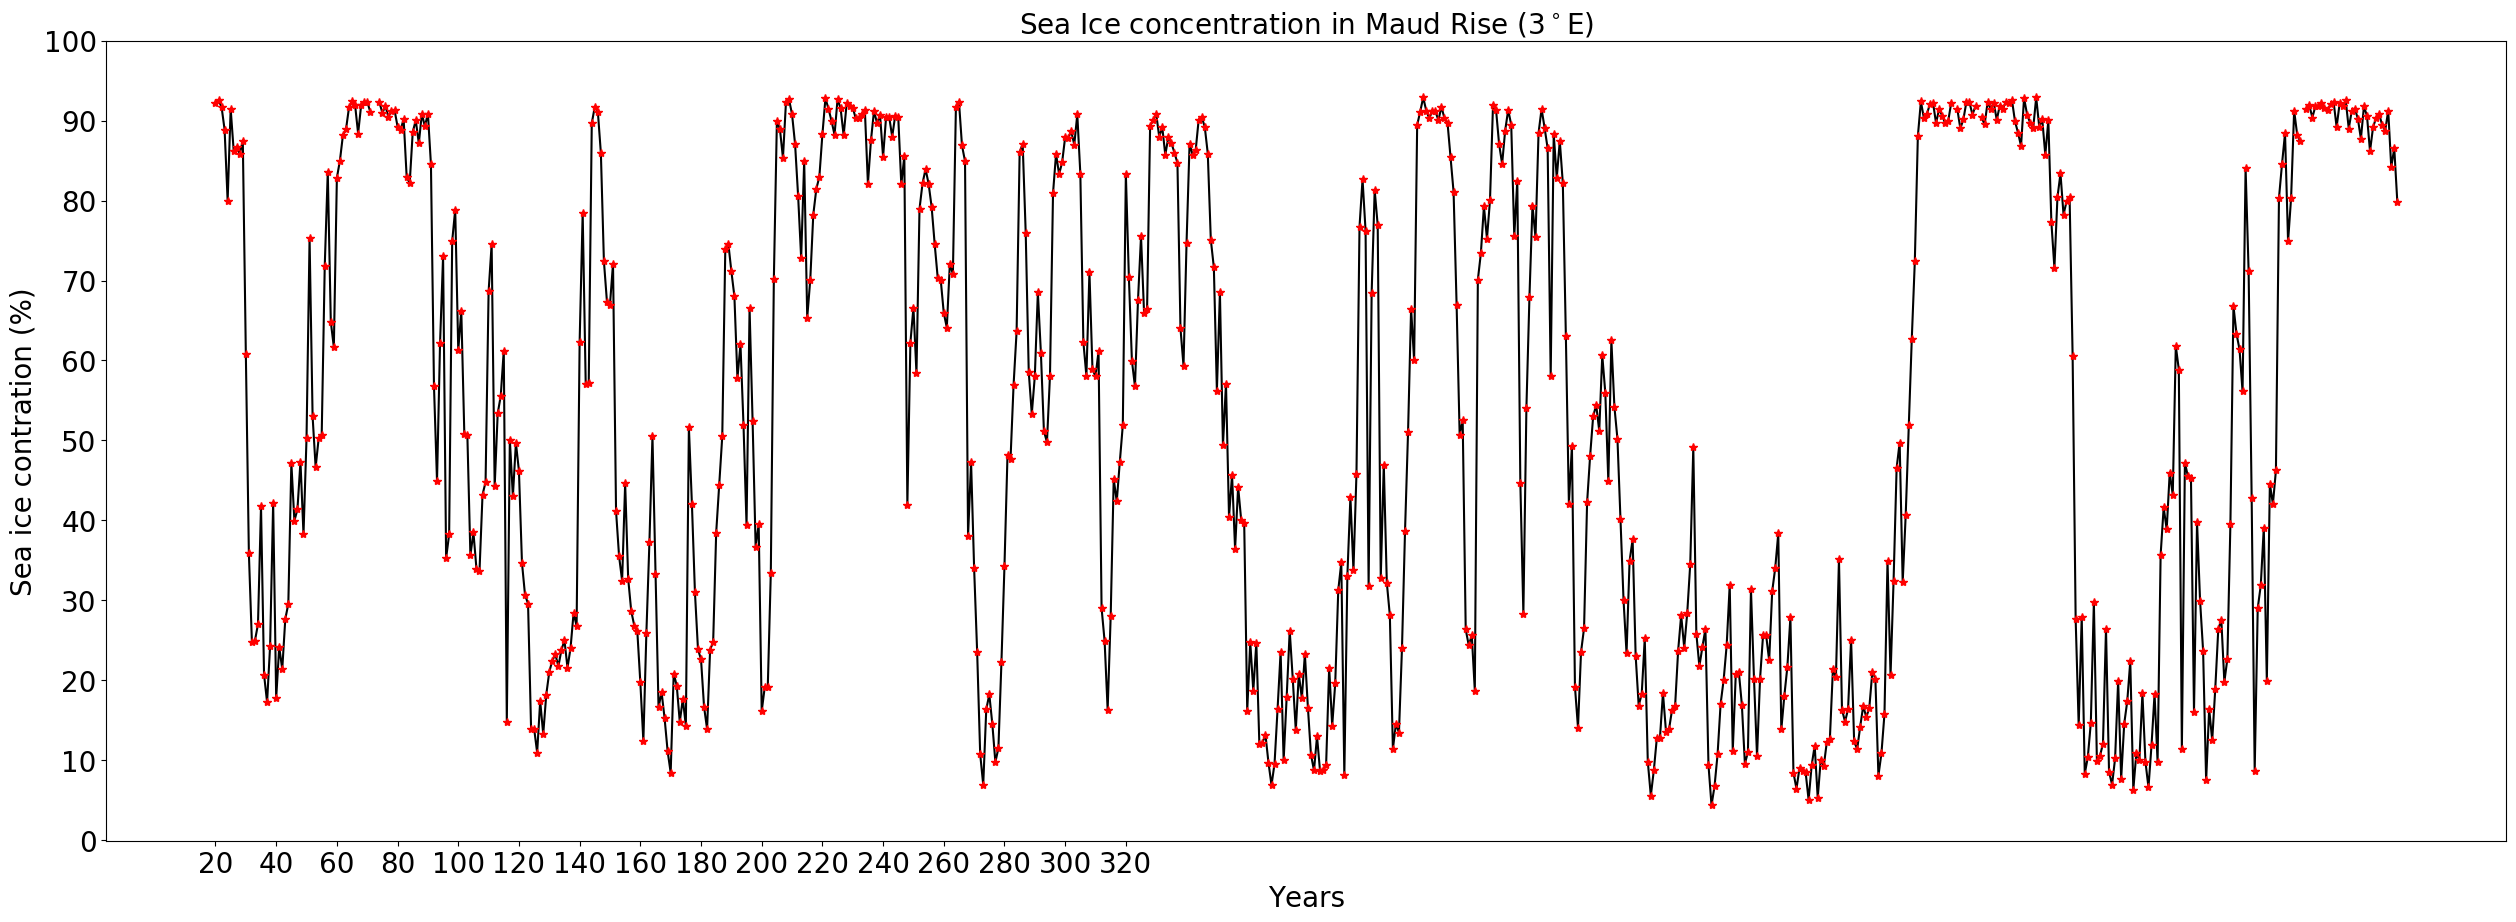

In [17]:
fig = plt.figure(figsize=(30, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(maudrise,'k')
im = ax0.plot(maudrise,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,311,20), ['20', '40', '60', '80','100','120','140','160',\
                             '180','200','220', '240', '260','280','300','320'],**my_font)
plt.yticks(range(0,101,10), ['0', '10','20','30', '40', '50','60','70', '80','90','100'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Sea ice contration (%)',**my_font)
ax0.set_title('Sea Ice concentration in Maud Rise (3$^\circ$E)',**my_font)
plt.savefig("maudrise.png")
np.savetxt('maudrise.out', maudrise)

In [18]:
final = np.zeros((310))
years = np.arange(0,3720,12)
i = 0
for ii in years:
    final[i] = (result[ii]+result[ii+1]+result[ii+2]+result[ii+3]+result[ii+4]+result[ii+5]+result[ii+6]+result[ii+7]+result[ii+8]+result[ii+9]+result[ii+10]+result[ii+11])/12
    #final[i,:] = (result[ii,:]+result[ii+1,:]+result[ii+2,:])/3
    i = i+1

ValueError: setting an array element with a sequence.